In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import bernoulli
from scipy.optimize import minimize
import random
import torch
import scipy.stats as stats

In [ ]:
def plausibility(p: float, array: list):
  summ = 0
  for x, y in array:
    summ += x*np.log(p) + (1-x)*np.log(1-p)
  return summ

def objective_function(p, x):
    return -plausibility(p, x)

In [ ]:
df = pd.read_csv('cars93.csv')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [ ]:
# Среднее выборочное значение
summ_power =  df['Horsepower'].astype(int).sum()
count_power = df.shape[0]

medium_power = summ_power/count_power
print('Среднее выборочное значение =',medium_power)

Среднее выборочное значение = 143.8279569892473


In [ ]:
# Дисперсия для мощности автомобиля
disper = df['Horsepower'].var()
print('Дисперсия =',disper)

# Среднеквадратичное отколнение
std = df['Horsepower'].std()
print('Стандратное (среднекавдратичное) значение=', std)

Дисперсия = 2743.0787751285648
Стандратное (среднекавдратичное) значение= 52.37440954443844


In [ ]:
#Высиляем квартили мощность
quar = df['Horsepower'].quantile([0.25, 0.5, 0.75])
print('Квартили =\n', quar)

Квартили =
 0.25    103.0
0.50    140.0
0.75    170.0
Name: Horsepower, dtype: float64


In [ ]:
#Вычисляем медиану для мощности авто
med = df['Horsepower'].median()
print('Медиана =', med)

Медиана = 140.0


In [ ]:
df_group = df.groupby('Horsepower')['Model'].count().reset_index()
graph = px.bar(df_group, x = 'Horsepower', y = 'Model', color = 'Model').update_layout(
    title = 'Зависимость количества моделей от мощности',
    xaxis_title = 'Мощность автомобиля',
    yaxis_title = 'Количестов моделей'
)
graph.show()




<Axes: >

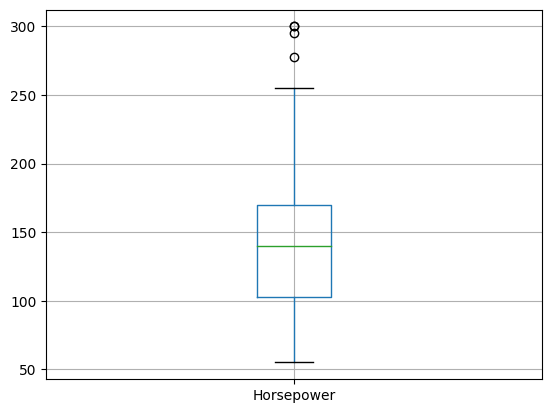

In [ ]:
df.boxplot(column='Horsepower')

In [ ]:
# Для параметра распеделеления Бернулли. Выборка из 10 чисел
# На просторах интеренета рекумендуют использовать bernoulli.fit(), однако я не буду использовать, так как он не доступен
# Генерируем сулчайную выборку из распределния Бернулли, где на каждый результат будет свое количество испытаний
# Предупреждение: выборка может сгенерироваться аномально, поэтому будут возникать предупреждения об ошибке в логорифме или оценка максимального правдоподобия будет меньше нуля

# Сразу определим функцию правдоподобия
def plausibility(p, data):
  summ = 0
  for  r, t in data:
    summ += r*np.log(p) + (1-r)*np.log(1-p)
  return summ

# Генерируем выборность с результатами испытаний и количеством испытний для каждого результата
data = {}

for i in range(10):
  if 'result' not in data:
    data['result'] = [round(random.random())]
    data['trials'] = [round(random.randrange(1, 10))]
  else:
    data['result'].append(round(random.random()))
    data['trials'].append(round(random.randrange(1, 10)))
print(data)
# Сгенерировали. Теперь передлываем в картеджи

data_2 = pd.DataFrame(data)
data_3 = list(zip(data_2['result'], data_2['trials']))

#Присутпаем к оценки макисмального правдоподобия. Для этого будем использовать minmize. ДЛя начала инициализируем оценку правдоподобия

p = 0.5

max_p = minimize(lambda p: -plausibility(p, data_3),p, method = 'BFGS').x
print(max_p) #Напрмер результат 0.50999 для выборки {'result': [0.99, 0.21, 0.8, 0.04, 0.37, 0.9, 0.38, 0.11, 0.76, 0.54], 'trials': [9, 9, 2, 9, 1, 7, 2, 7, 8, 8]}




{'result': [0, 0, 1, 1, 0, 0, 0, 1, 1, 1], 'trials': [5, 6, 4, 2, 3, 4, 8, 3, 1, 1]}
[0.5]


In [ ]:
var =  round(data_2['result'].var(), 2)
print('Дисперсия =', var)
print('Математическое ожидание =', np.mean(data['result']))

Дисперсия = 0.28
Математическое ожидание = 0.5


In [ ]:
#Для вычисления смещения опеределнного параметра надо знать его математическое ожидание его и сам параметр
#В некоторых формулах встречалось, что разность между значениями выше деляиться на количество чисел в выборке

#Например, я хочу вычислить теоретическое смещение для диспресии

mean_var = np.mean(var) #Однако среднее значение одного параметра равно значению параметра
theoretical_bias = mean_var - var
print(f'Теоретическое смещение = {theoretical_bias}') # Таким образом оно будет равно нулю

Теоретическое смещение = 0.0


In [ ]:
#Теперь вычислим доверительный интервал с уровнем 0.95
level = 0.95
lenght = count_power
#Стандартное отклонение уже есть(std), срднее значение тоже есть (medium_power)

free = lenght - 1 #Степень сводбода
alpha = (1 - level)/2 #Уровень значимости
t_value = stats.t.ppf(1 - alpha, free)
margin_of_error = t_value * (std / lenght**0.5)
print(f'Доверительный интервал для уровня {level} = {round(medium_power, 2)} +- {round(margin_of_error, 2)}')





Доверительный интервал для уровня 0.95 = 143.83 +- 10.79


In [ ]:
#Проверка согласованности при помощи критерия Пирсона
import scipy.stats as stats
data_power = df['Horsepower'].to_numpy()

st, p = stats.normaltest(data_power)
#st - статистика теста, p - значение
if p > alpha:
  print('Согласуется с нормальным законом')
else:
  print('Несогласуется с нормальным заканом')

Несогласуется с нормальным заканом


In [ ]:
#Проверяем независимость мощности и цен против положительной корреляции

correlation = df['Horsepower'].corr(df['Price'])

if abs(correlation) > -0.5:
  print('Есть линейаня зависимость')
else:
  print('Зависимость слабая')

print(f'Корреляция = {round(correlation, 2)}')

Есть линейаня зависимость
Корреляция = 0.79
